# Домашнее задание по графам и NetworkX
Для выполнения заданий понадобится скачать данные о политических блогах: направленная связь между блогами устанавливается, если один процитировал другой.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Повторение NetworkX (1 балл)
1. Cчитайте данные из файла `polblogs_edgelist.txt`
2. Выведите количество блогов и связей между ними
2. Визуализируйте полученный граф (возможно, потребуется увеличить размер графика)

In [4]:
polblogs = nx.read_edgelist("polblogs_edgelist.txt")

In [6]:
print('Number of nodes:', polblogs.number_of_nodes())
print('Number of edges:', polblogs.number_of_edges())

Number of nodes: 1224
Number of edges: 16718


Wall time: 10.4 s


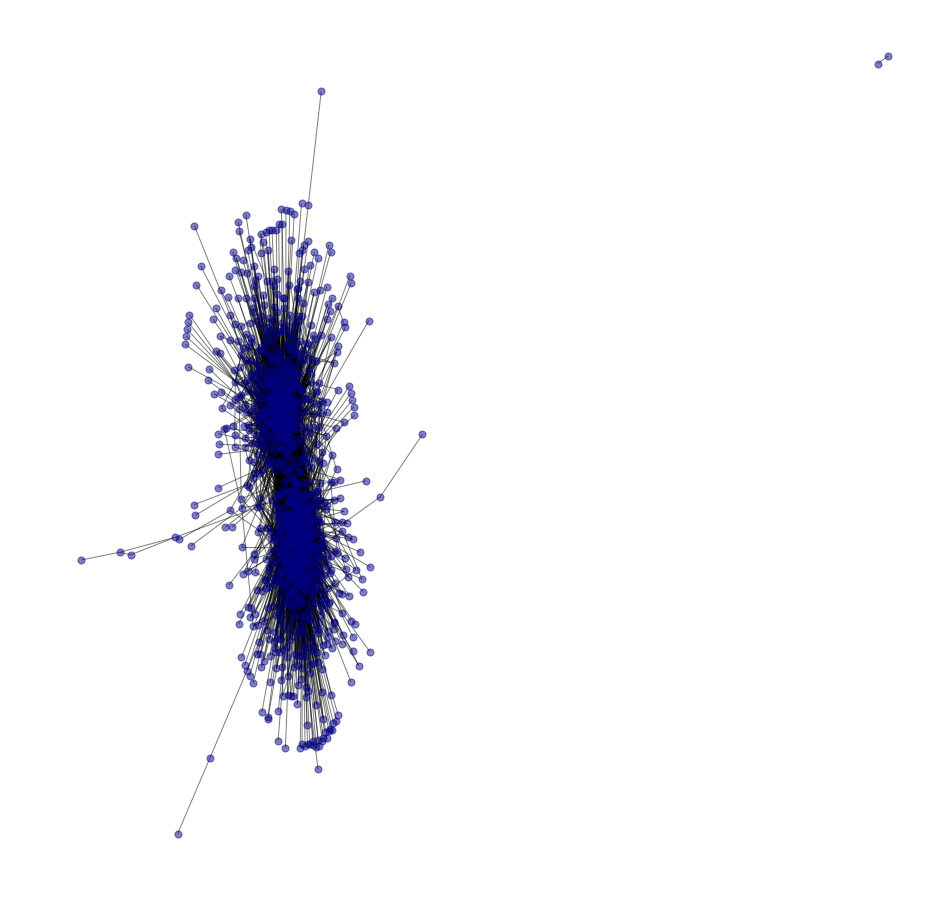

In [53]:
%%time
plt.figure(figsize=(16, 16))
nx.draw_networkx(polblogs, node_color='navy', edges_color='lightblue', with_labels=False, node_size=50, alpha=0.5)
plt.axis('off')

## Анализ связности графа (1 балл)
Вам дана функция `shortest_path_lengths`, возвращающая список длин всех кратчайших путей в графе.

Выведите минимальную, максимальную и среднюю длину кратчайшего пути в графе

In [14]:
def shortest_path_lengths(graph):
    '''
        Return lengths of all the possible shortest paths in the `graph`.
    '''
    lengths = []
    for node in graph.nodes():
        # get a dict of pairs node:path
        node_paths = nx.single_source_shortest_path(graph, node)
        # remove a self-loop
        if node in node_paths:
            node_paths.pop(node)
        # apply len() to every path and save result
        lengths += list(map(len, node_paths.values()))
    return lengths

In [25]:
import numpy as np

In [29]:
np.min (shortest_path_lengths(polblogs))

2

In [28]:
np.max(shortest_path_lengths(polblogs))

9

In [27]:
np.mean (shortest_path_lengths(polblogs))

3.737527344671542

## Метрики на графе ( балла)

Вычислите и проанализируйте следующие метрики:
- центральность по степени (`degree`)
- центральность по близости (`closeness`)
- центральность по посредничеству (`betweenness`)

Полный балл будет ставиться только при наличии пояснений и интерпретации полученных результатов!

In [35]:
%%time
degree = nx.degree_centrality(polblogs)

Wall time: 0 ns


In [33]:
%%time
betweenness = nx.betweenness_centrality(polblogs)

Wall time: 18.9 s


In [36]:
%%time
closeness = nx.closeness_centrality(polblogs)

Wall time: 22.1 s


In [43]:
import pandas as pd

In [54]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

pd.DataFrame(graph_measures).sort_values(by='closeness', ascending=False)

,degree,betweenness,closeness
instapundit.com,0.250204,0.049434,0.518504
dailykos.com,0.286999,0.088067,0.517843
talkingpointsmemo.com,0.224039,0.047514,0.502268
atrios.blogspot.com,0.226492,0.034082,0.497552
littlegreenfootballs.com/weblog,0.160262,0.024105,0.493723
washingtonmonthly.com,0.178250,0.027653,0.489363
drudgereport.com,0.198692,0.068024,0.484308
michellemalkin.com,0.172527,0.027704,0.483348
truthlaidbear.com,0.162715,0.042097,0.480301
blogsforbush.com,0.246116,0.097688,0.477666


Центральность по близости выражает, насколько близко узел расположен к остальным узлам сети. В принципе, эта метрика показывает, как быстро может распространяться информация в данной сети)

В данной таблице мы видим, что показатели центральности по близости для многих блогов достигают достаточно больших значений (в принципе, все показатели за исключением 2 выбросов (эти точки в принципе не связаны с другими вершинами графа, как мы видим на построенной выше модели) находятся в промежутке от 0,18 до ~ 0,52. Соответственно, информация в сети этих блогов распространяется довольно-таки быстро

In [47]:
pd.DataFrame(graph_measures).sort_values(by='degree', ascending=False)

,degree,betweenness,closeness
dailykos.com,0.286999,0.088067,0.517843
instapundit.com,0.250204,0.049434,0.518504
blogsforbush.com,0.246116,0.097688,0.477666
atrios.blogspot.com,0.226492,0.034082,0.497552
talkingpointsmemo.com,0.224039,0.047514,0.502268
drudgereport.com,0.198692,0.068024,0.484308
powerlineblog.com,0.182339,0.023656,0.473767
washingtonmonthly.com,0.178250,0.027653,0.489363
michellemalkin.com,0.172527,0.027704,0.483348
truthlaidbear.com,0.162715,0.042097,0.480301


Центральность по степени выражает, сколько других вершин связано с текущей вершиной.

В данной таблице мы видим, что центральность по степени достаточно высокая, и наиболее центральные вершины связаны практически с четвертью всех прочих вершин (максимальное значение - ~0,285), но в то же время многие вершины имеют низкий показатель центральности по степени: таким образом, центральность по близости разграничивает популярные и непопулярные блоги, причем те блоги, у которых центральность по близости высокая,обладают также высокой центральностью по близости (но это мы рассмотрим уже в финальном выводе)

In [56]:
pd.DataFrame(graph_measures).sort_values(by='betweenness', ascending=False)

,degree,betweenness,closeness
blogsforbush.com,0.246116,0.097688,0.477666
dailykos.com,0.286999,0.088067,0.517843
drudgereport.com,0.198692,0.068024,0.484308
instapundit.com,0.250204,0.049434,0.518504
talkingpointsmemo.com,0.224039,0.047514,0.502268
truthlaidbear.com,0.162715,0.042097,0.480301
atrios.blogspot.com,0.226492,0.034082,0.497552
etalkinghead.com,0.061325,0.028049,0.428924
michellemalkin.com,0.172527,0.027704,0.483348
washingtonmonthly.com,0.178250,0.027653,0.489363


Центральность по посредничеству выражает, сколько кратчайших путей между всеми узлами сети проходит через определённый узел. 

В данной таблице у большинства вершин центральность по посредничеству низкая, и максимальные значения не достигают даже 0,09 - соответственно даже через максимально расположенный на пересечении потоков информации блог проходит менее 10% всех кратчайших путей, и в то же время через многие вершины в принципе не проходят никакие кратчайшие пути, потому что они находятся по краям графа блогов.

*$Общий$* *$вывод$*

Таким образом, по представленным выше таблицам метрик мы видим, что большая часть вершин графа характеризуется высокой центральностью по близости, но при этом низкой центральностью по посредничеству: соответственно, вершины графа, по большей части, напрямую связаны между собой. В принципе, это подтверждается умеренно высокой центральностью по степени, которая показывает, что у многих вершин большое количество соседей (каждый узел связан большим количеством ребер с другими узлами)